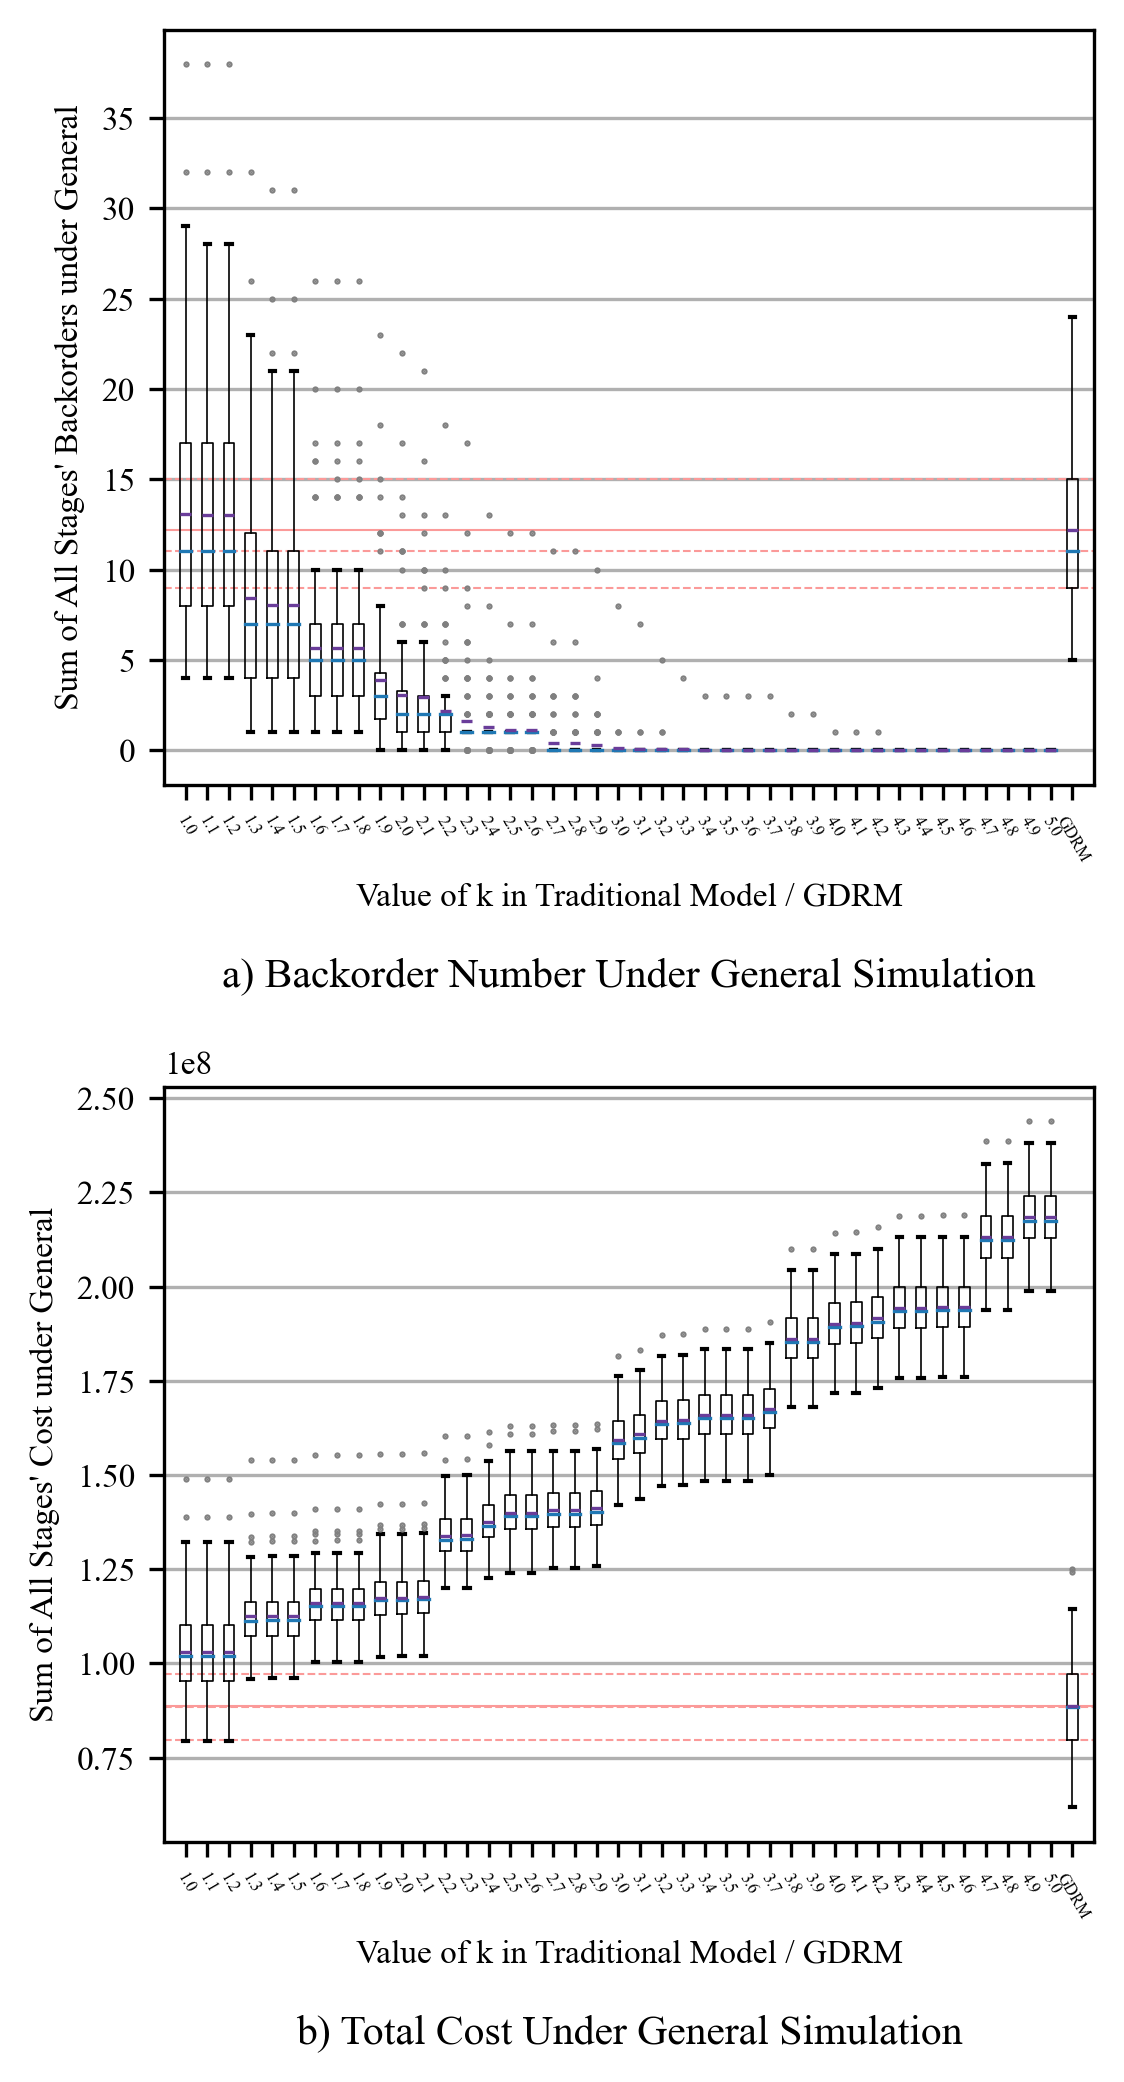

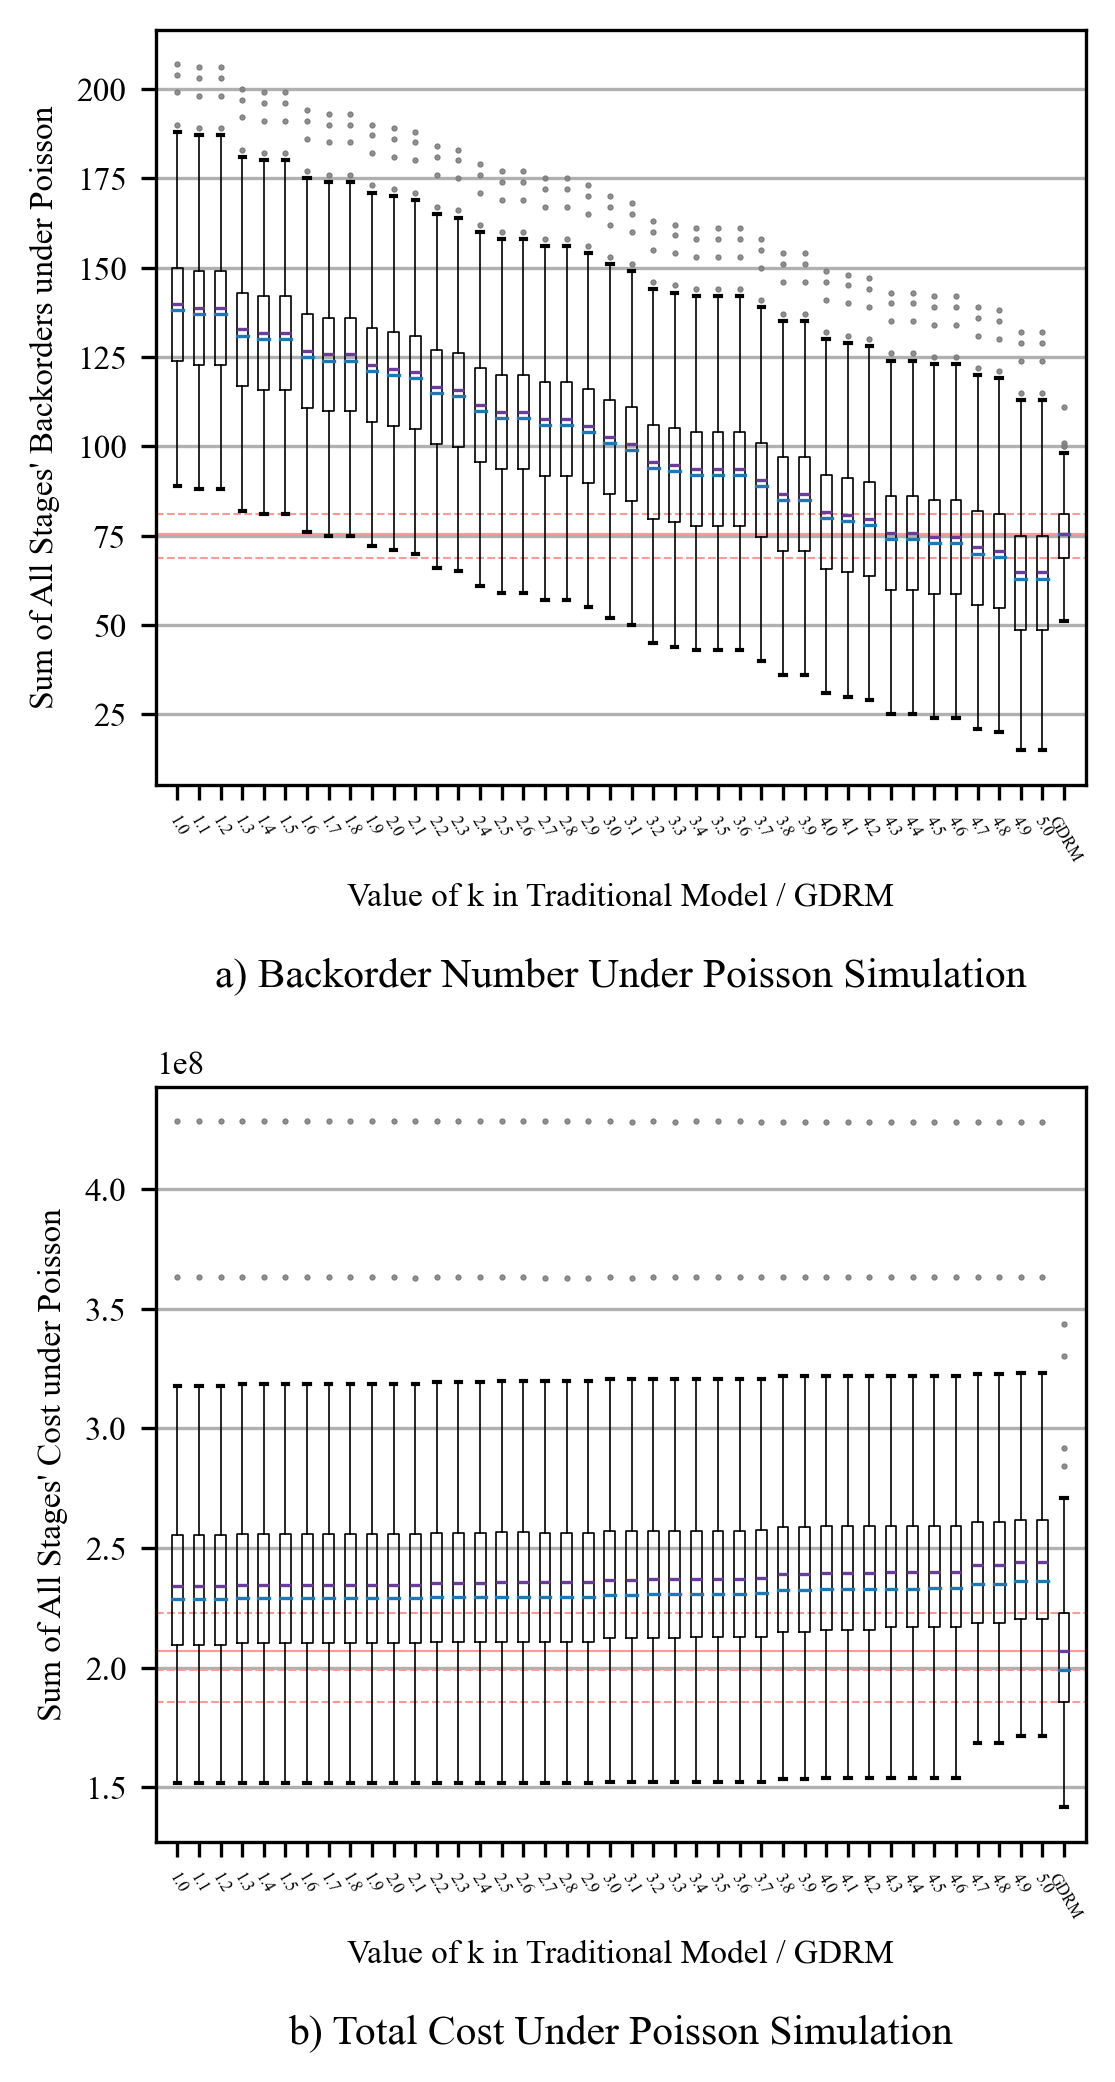

In [1]:
import os
import numpy
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import brewer2mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

N = 22

General_Backorder = [] #50*100*22
General_Cost = []
Poisson_Backorder = []
Poisson_Cost = []
General_Backorder_New = [] #100*22
General_Cost_New = []
Poisson_Backorder_New = []
Poisson_Cost_New = []

File = open("Trad-General-Simulation.txt", mode='r')
temp = []
temp2 = []
while True:
    Line = File.readline()
    if Line:
        Line = Line[:-2]
        Line = list(map(float,Line.split('\t')))
        Line = Line[2:]
        temp.append(sum(Line[N:(2*N)]))
        temp2.append(sum(Line[0:N])*100)
        if len(temp) == 100:
            General_Backorder.append(temp)
            General_Cost.append(temp2)
            temp = []
            temp2 = []
    else:
        break
File.close()

File = open("Trad-Poisson-Simulation.txt", mode='r')
temp = []
while True:
    Line = File.readline()
    if Line:
        Line = Line[:-2]
        Line = list(map(float,Line.split('\t')))
        Line = Line[2:]
        temp.append(sum(Line[N:(2*N)]))
        temp2.append(sum(Line[0:N])*100)
        if len(temp) == 100:
            Poisson_Backorder.append(temp)
            Poisson_Cost.append(temp2)
            temp = []
            temp2 = []
    else:
        break
File.close()

File = open("New-General-Simulation.txt", mode='r')
while True:
    Line = File.readline()
    if Line:
        Line = Line[:-2]
        Line = list(map(float,Line.split('\t')))
        Line = Line[1:]
        General_Backorder_New.append(sum(Line[N:(2*N)]))
        General_Cost_New.append(sum(Line[0:N])*100)
    else:
        break
File.close()

File = open("New-Poisson-Simulation.txt", mode='r')
while True:
    Line = File.readline()
    if Line:
        Line = Line[:-2]
        Line = list(map(float,Line.split('\t')))
        Line = Line[1:]
        Poisson_Backorder_New.append(sum(Line[N:(2*N)]))
        Poisson_Cost_New.append(sum(Line[0:N])*100)
    else:
        break
File.close()

General_Backorder.append(General_Backorder_New)
General_Cost.append(General_Cost_New)
Poisson_Backorder.append(Poisson_Backorder_New)
Poisson_Cost.append(Poisson_Cost_New)

k_list = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,
         2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,
          3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,
         4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0]
k_list.append('GDRM')

params = {'axes.labelsize': 8,
         'axes.titlesize':10,
         'xtick.labelsize':4,
         'ytick.labelsize':8}
pylab.rcParams['lines.linewidth'] = 0.5
pylab.rcParams['figure.dpi'] = 300
pylab.rcParams['figure.figsize'] = (4.0, 8.0)
bmap = brewer2mpl.get_map('Paired', 'qualitative', 10)
colors = bmap.mpl_colors
pylab.rcParams['axes.prop_cycle'] = pylab.cycler('color',colors)
pylab.rcParams["font.family"] = "Times New Roman"
pylab.rcParams.update(params)

fig=plt.figure()
ax=fig.add_subplot(211)
ax.plot(numpy.array([numpy.median(General_Backorder_New)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(General_Backorder_New,75)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(General_Backorder_New,25)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.average(General_Backorder_New)]*(len(k_list)+2)), color=colors[4])
ax.boxplot(General_Backorder, labels = k_list, boxprops={'linewidth':0.4},
           flierprops={'markersize':0.5,'markerfacecolor':'grey','markeredgecolor':'grey'},
           medianprops={'linewidth':0.8},whiskerprops={'linewidth':0.4},
          showmeans=True,meanline=True,meanprops={'linewidth':0.8,'color':colors[9]})
ax.set_xlabel("Value of k in Traditional Model / GDRM")
ax.set_ylabel("Sum of All Stages' Backorders under General")
ax.locator_params('both')
ax.grid(axis="y")
ax.set_xticklabels(labels=k_list,rotation=-60)
ax.set_title("a) Backorder Number Under General Simulation", y=-0.3)
ax.set_xlim(0,len(k_list)+1)

ax=fig.add_subplot(212)
ax.plot(numpy.array([numpy.median(General_Cost_New)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(General_Cost_New,75)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(General_Cost_New,25)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.average(General_Cost_New)]*(len(k_list)+2)), color=colors[4])
ax.boxplot(General_Cost, labels = k_list, boxprops={'linewidth':0.4},
           flierprops={'markersize':0.5,'markerfacecolor':'grey','markeredgecolor':'grey'},
           medianprops={'linewidth':0.8},whiskerprops={'linewidth':0.4},
          showmeans=True,meanline=True,meanprops={'linewidth':0.8,'color':colors[9]})
ax.set_xlabel("Value of k in Traditional Model / GDRM")
ax.set_ylabel("Sum of All Stages' Cost under General")
ax.locator_params('both')
ax.grid(axis="y")
ax.set_xticklabels(labels=k_list,rotation=-60)
ax.set_title("b) Total Cost Under General Simulation", y=-0.3)
ax.set_xlim(0,len(k_list)+1)
plt.subplots_adjust(hspace =0.4)
plt.show()

fig=plt.figure()
ax=fig.add_subplot(211)
ax.plot(numpy.array([numpy.median(Poisson_Backorder_New)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(Poisson_Backorder_New,75)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(Poisson_Backorder_New,25)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.average(Poisson_Backorder_New)]*(len(k_list)+2)), color=colors[4])
ax.boxplot(Poisson_Backorder, labels = k_list, boxprops={'linewidth':0.4},
           flierprops={'markersize':0.5,'markerfacecolor':'grey','markeredgecolor':'grey'},
           medianprops={'linewidth':0.8},whiskerprops={'linewidth':0.4},
          showmeans=True,meanline=True,meanprops={'linewidth':0.8,'color':colors[9]})
ax.set_xlabel("Value of k in Traditional Model / GDRM")
ax.set_ylabel("Sum of All Stages' Backorders under Poisson")
ax.locator_params('both')
ax.grid(axis="y")
ax.set_xticklabels(labels=k_list,rotation=-60)
ax.set_title("a) Backorder Number Under Poisson Simulation", y=-0.3)
ax.set_xlim(0,len(k_list)+1)

ax=fig.add_subplot(212)
ax.plot(numpy.array([numpy.median(Poisson_Cost_New)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(Poisson_Cost_New,75)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.percentile(Poisson_Cost_New,25)]*(len(k_list)+2)), linestyle='--', color=colors[4])
ax.plot(numpy.array([numpy.average(Poisson_Cost_New)]*(len(k_list)+2)), color=colors[4])
ax.boxplot(Poisson_Cost, labels = k_list, boxprops={'linewidth':0.4},
           flierprops={'markersize':0.5,'markerfacecolor':'grey','markeredgecolor':'grey'},
           medianprops={'linewidth':0.8},whiskerprops={'linewidth':0.4},
          showmeans=True,meanline=True,meanprops={'linewidth':0.8,'color':colors[9]})
ax.set_xlabel("Value of k in Traditional Model / GDRM")
ax.set_ylabel("Sum of All Stages' Cost under Poisson")
ax.locator_params('both')
ax.grid(axis="y")
ax.set_xticklabels(labels=k_list,rotation=-60)
ax.set_title("b) Total Cost Under Poisson Simulation", y=-0.3)
ax.set_xlim(0,len(k_list)+1)
plt.subplots_adjust(hspace =0.4)
plt.show()